In [ ]:
#importing required packages for data manipulation and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing packages for model
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


In [ ]:
data = pd.read_csv("Bank.csv")#reading file

In [ ]:
data_df = pd.DataFrame(data)

In [ ]:
data_df.shape

(10000, 12)

In [ ]:
data_df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

#### Data Set has Country and Gender which are of object datatype

In [ ]:
data_df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
data_df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
## Checking for the Unique values in the Data Set
data_df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [ ]:
#target variable is Churn
data_df['churn'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: churn
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [ ]:
data_df['churn'].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [ ]:
data_df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

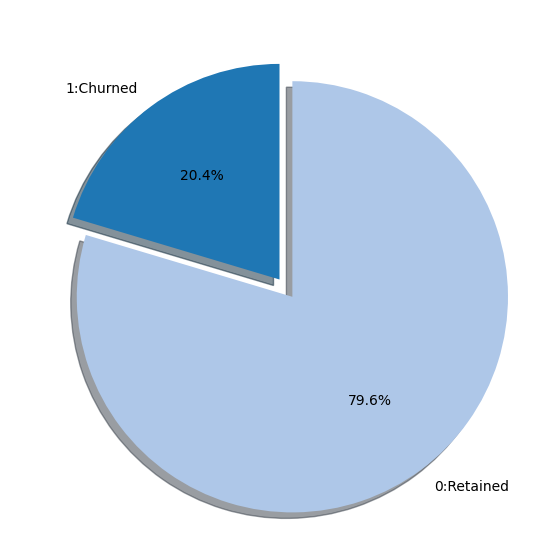

In [ ]:
colors=sns.color_palette("tab20")
labels = '1:Churned', '0:Retained'
sizes = [data_df.churn[data_df['churn']==1].count(), data_df.churn[data_df['churn']==0].count()]
explode = (0, 0.1)
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, textprops={'fontsize': 10}, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
plt.show()

We see that the 79.6% of the churn data is for 0 while 20.4% is for 1

**The data is Highly imbalanced**

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.

NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes.

In our dataseet the model is oversampled on the churn target variable towards

In [ ]:
data_df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### our data has no missing values
Handling missing data is a crucial step in the data preprocessing phase of machine learning in Python. Missing data can lead to biased models and incorrect predictions, so it's important to address this issue effectively.

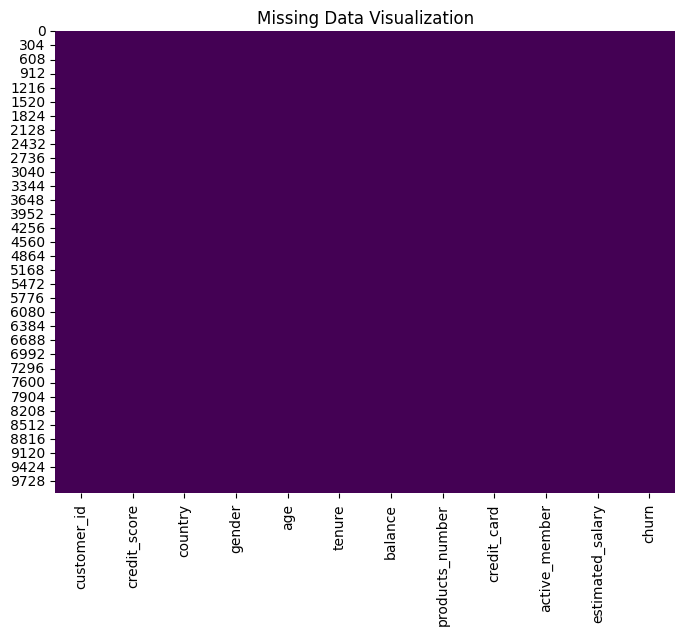

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Visualization')
plt.show()# there are no missing values in the dataset

**We see that there are no missing values in the data from the above visual**

### Ways to handle Missing data
1)Replacing Missing Data:
You can replace missing values with a specific value, such as the mean, median, or a constant value.
2)Removing Rows with Missing Data(may be a costly affair)
This is a simple approach, but it may lead to a significant loss of data. You can use the dropna() method to remove rows with missing values.
3)Interpolation:
For time-series data, you can use interpolation methods like linear or polynomial interpolation to estimate missing values.

<Axes: >

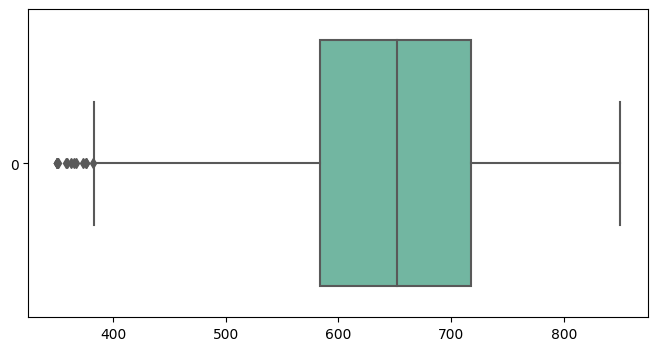

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data_df['credit_score'], orient='h', palette='Set2')

<Axes: xlabel='credit_score'>

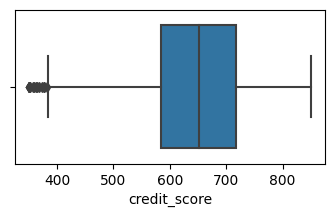

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(4, 2))
sns.boxplot(x='credit_score', data=data_df, ax=axs)

<Axes: xlabel='age'>

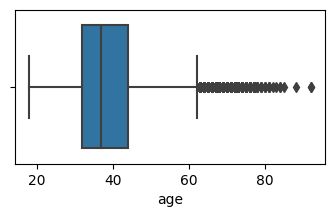

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(4, 2))
sns.boxplot(x='age', data=data_df, ax=axs)

In [ ]:
data_df['balance'].value_counts()

0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: balance, Length: 6382, dtype: int64

In [ ]:
data_df['credit_score'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: credit_score, Length: 460, dtype: int64

In [ ]:
data_df['balance']

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: balance, Length: 10000, dtype: float64

In [ ]:
data_df = data_df.drop('customer_id',axis=1) #droping customer id as it is not relevant for the analysis


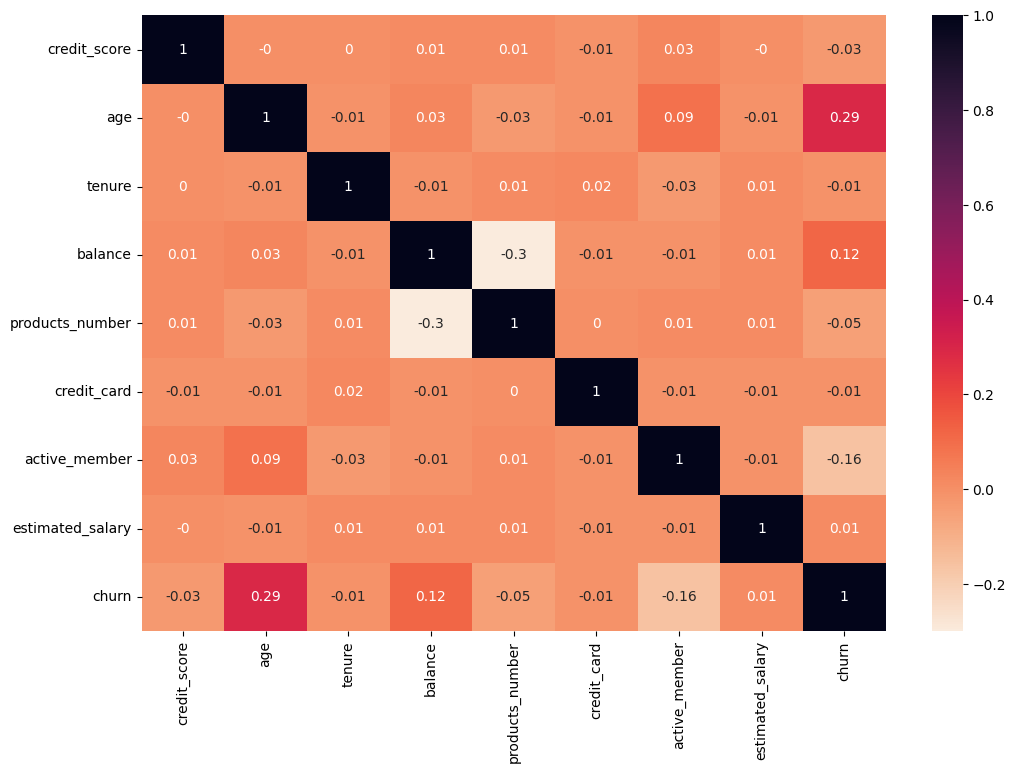

In [ ]:
#corealtion matrix
c_map=sns.color_palette("rocket_r", as_cmap=True)
correlation = data_df.corr(numeric_only=True).round(2)
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot = True, cmap = c_map)
plt.show()

**Analyzing the numerical features**

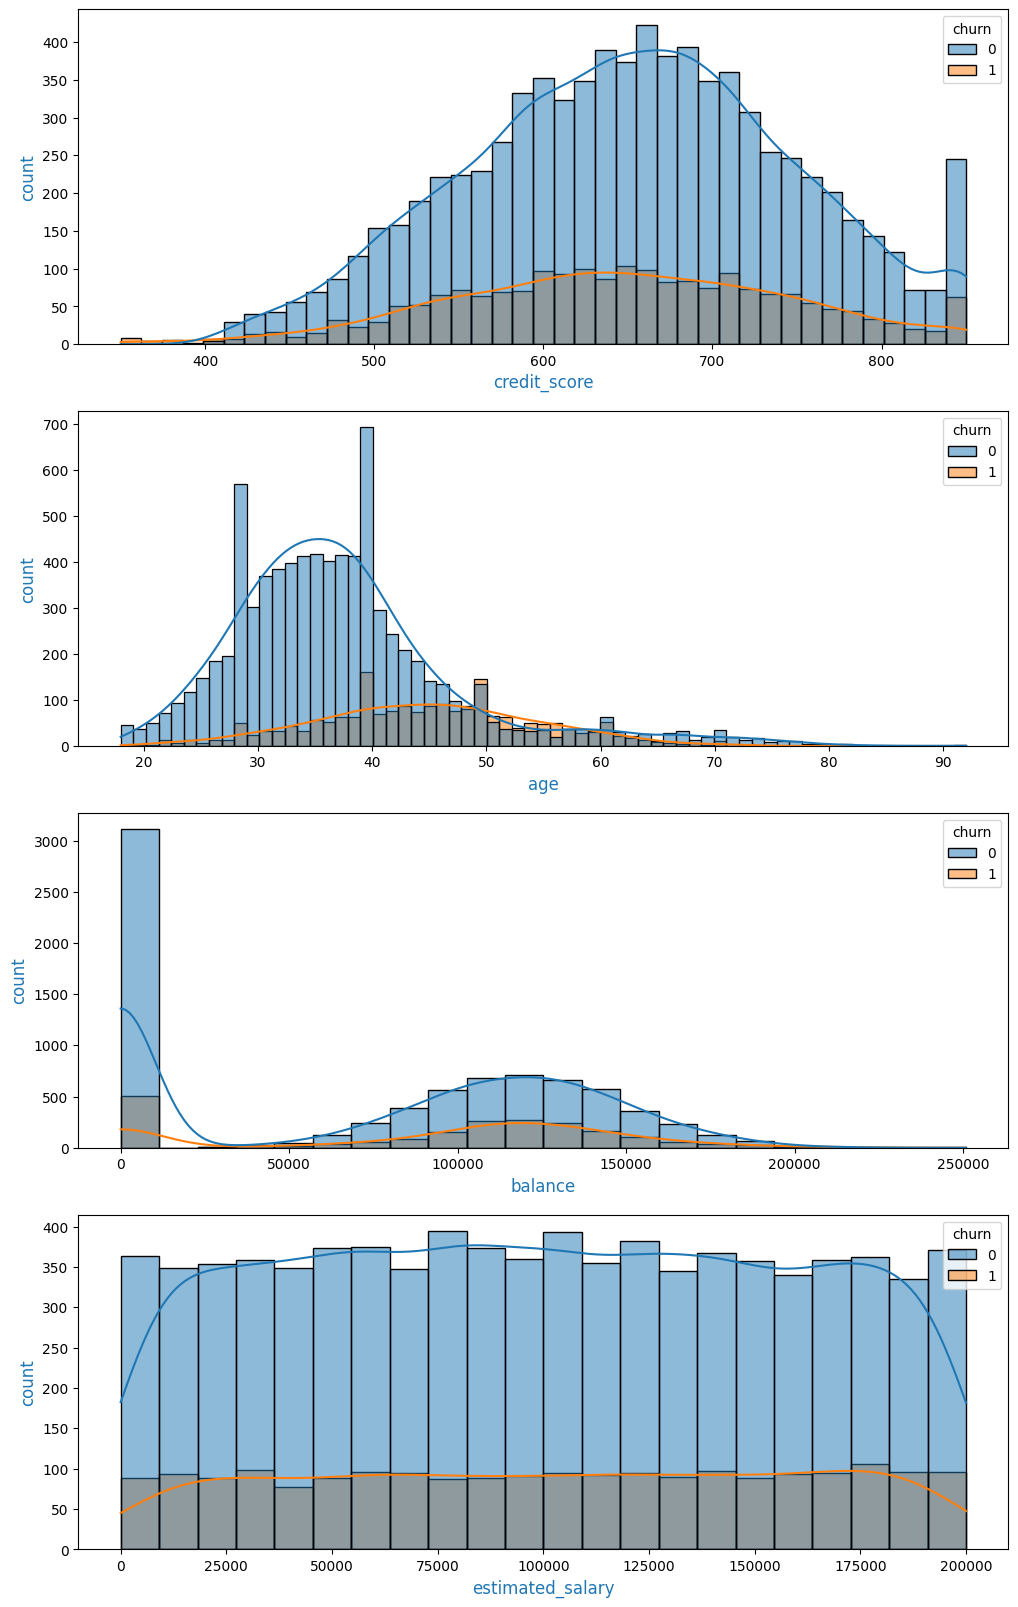

In [ ]:
plt.figure(figsize=(12,20))

plt.subplot(4,1,1)
sns.histplot(data_df, x='credit_score', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('credit_score', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,2)
sns.histplot(data_df, x='age', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,3)
sns.histplot(data_df, x='balance', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('balance', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.subplot(4,1,4)
sns.histplot(data_df, x='estimated_salary', hue='churn', kde=True, palette=[colors[0], colors[2]])
plt.xlabel('estimated_salary', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])

plt.show()

**Analyzing the categorical features**

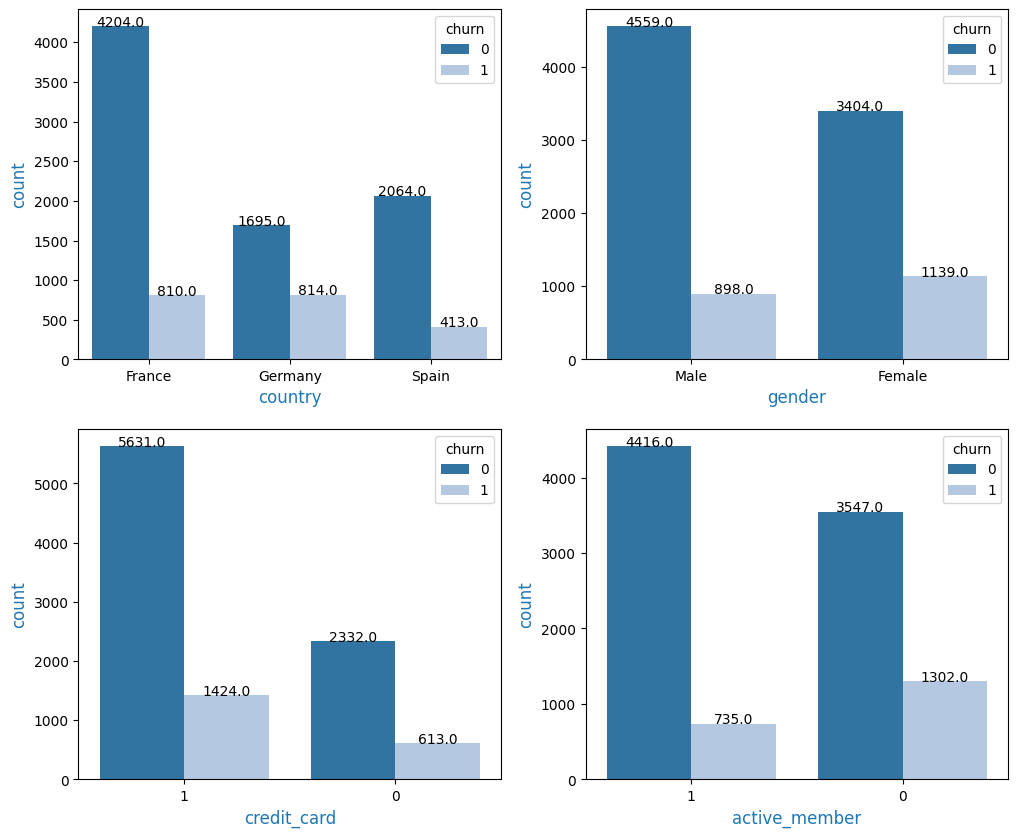

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
cplot = sns.countplot(data=data_df, x='country', hue='churn', order=data_df['country'].value_counts().index, palette=colors)
plt.xlabel('country', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
    cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,2)
cplot = sns.countplot(data=data_df, x='gender', hue='churn', order=data_df['gender'].value_counts().index, palette=colors)
plt.xlabel('gender', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
    cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,3)
cplot = sns.countplot(data=data_df, x='credit_card', hue='churn', order=data_df['credit_card'].value_counts().index, palette=colors)
plt.xlabel('credit_card', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
    cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.subplot(2,2,4)
cplot = sns.countplot(data=data_df, x='active_member', hue='churn', order=data_df['active_member'].value_counts().index, palette=colors)
plt.xlabel('active_member', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
    cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

Germany has the highest number of churners.
Spain has relatively few churners.
Female churners > Male churners.
Most churners have credit cards but are not active members.

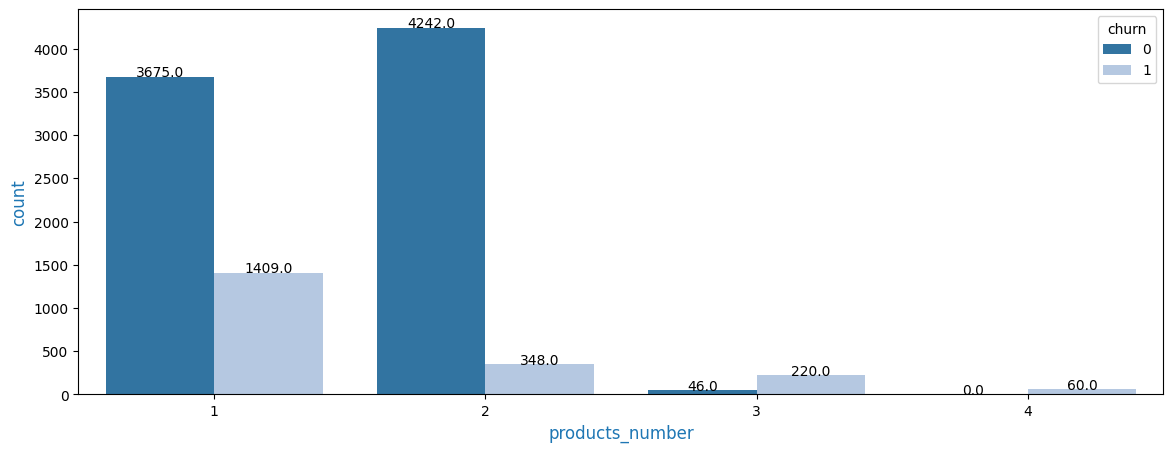

In [ ]:
plt.figure(figsize=(14,5))

cplot = sns.countplot(data=data_df, x='products_number', hue='churn', palette=colors)
plt.xlabel('products_number', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
  cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 10)

plt.show()

Most customers have only 1 or 2 products.
Most of the non-churners have 2 products.
Most of the churners have 1 product.


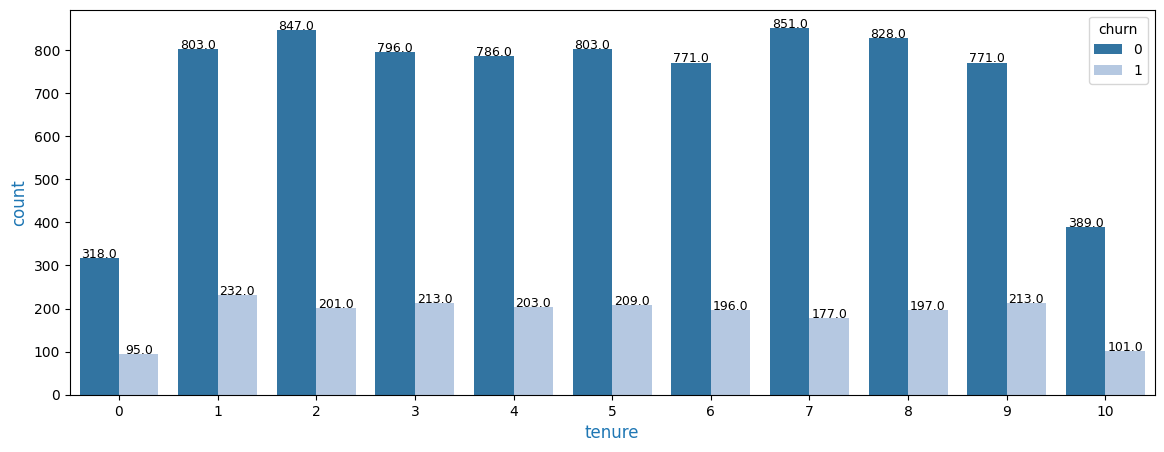

In [ ]:
plt.figure(figsize=(14,5))

cplot = sns.countplot(data=data_df, x='tenure', hue='churn', palette=colors)
plt.xlabel('tenure', fontsize=12, color=colors[0])
plt.ylabel('count', fontsize=12, color=colors[0])
for x in cplot.patches:
        cplot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), horizontalalignment='center', fontsize = 9)

plt.show()

Most churners have a tenure of 1 year.
Only a few customers have a tenure of 0 or 10 years.

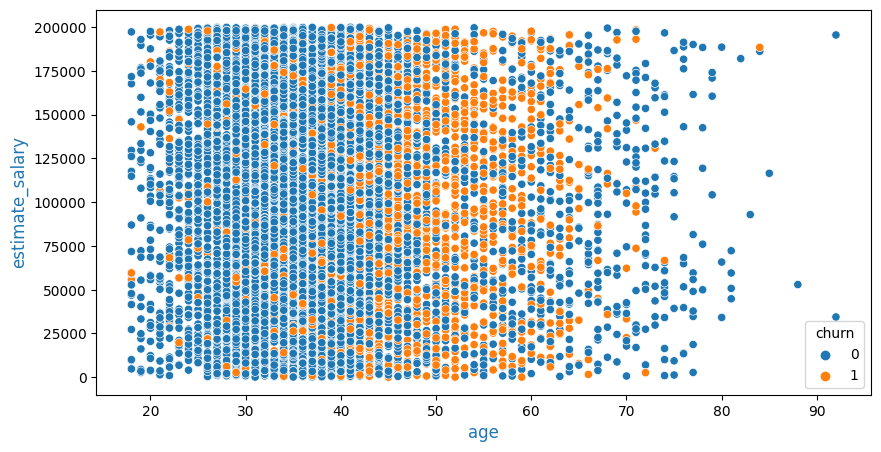

In [ ]:
#analysing age to salary  with respect to churn
plt.figure(figsize=(10,5))

sns.scatterplot(data=data_df, x='age', y='estimated_salary', hue='churn', palette=[colors[0], colors[2]])
plt.xlabel('age', fontsize=12, color=colors[0])
plt.ylabel('estimate_salary', fontsize=12, color=colors[0])

plt.show()


Most of the churners are of the age between 42 to 61

In [ ]:
dfEnc=data_df.copy()

In [ ]:
import scipy.stats as stats
import statistics

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_predict


In [ ]:
categorical_columns = ['country','gender']

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(dfEnc[categorical_columns])

# Concatenate the one-hot encoded columns to the original dataframe
df_encoded = pd.concat([dfEnc, one_hot_encoded], axis=1)

#Drop original categorical columns
df_encoded.drop(categorical_columns,axis=1,inplace=True)


In [ ]:
df_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
#Transform continuous columns
continuous_columns = ['credit_score','age','tenure','balance','products_number','estimated_salary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded[continuous_columns] = scaler.fit_transform(df_encoded[continuous_columns])
df_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0,1,0
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1,1,0
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0,1,0
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0,1,0
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1,1,0


In [ ]:
#Train Test Split
X = df_encoded.drop('churn',axis=1)
y = df_encoded['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


In [ ]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

In [ ]:
for clf_name, clf in classifiers:
    # Perform cross-validated predictions
    y_pred = cross_val_predict(clf, X_train, y_train, cv=5)

    # Calculate accuracy
    accuracy = accuracy_score(y_train, y_pred)

    # Print the classification report
    print(f'Classifier: {clf_name}')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_train, y_pred))
    print('----------------')

Classifier: Logistic Regression
Accuracy: 0.8139
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6370
           1       0.62      0.22      0.32      1630

    accuracy                           0.81      8000
   macro avg       0.73      0.59      0.61      8000
weighted avg       0.79      0.81      0.78      8000

----------------
Classifier: Decision Tree
Accuracy: 0.7931
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6370
           1       0.49      0.52      0.51      1630

    accuracy                           0.79      8000
   macro avg       0.68      0.69      0.69      8000
weighted avg       0.80      0.79      0.80      8000

----------------
Classifier: Random Forest
Accuracy: 0.8610
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      6370
           1       0.77      0.46      0.57      1630

    accuracy 

In [ ]:
#feature importance of the selected model
rfclf = RandomForestClassifier(n_estimators=100, random_state=42)
rfclf.fit(X_train, y_train)

# Get feature importances
feature_importances = rfclf.feature_importances_

# Create a DataFrame or print the importance values along with feature names
importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(importances_df)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


In [ ]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))
    # plt.figure(figsize=(3,3))
    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

#Method to plot AUC-ROC
from sklearn.metrics import roc_curve, auc
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(3,3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.76      0.44      0.56       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000


---------------------------------------------



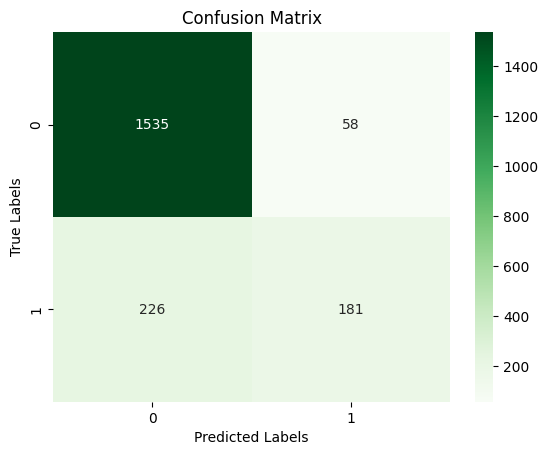

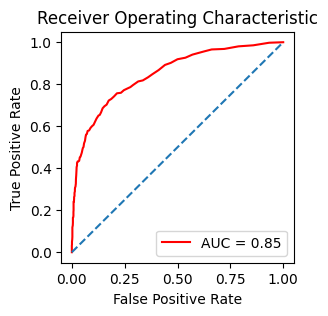

In [ ]:
# Creating the Random Forest classifier
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
RFC.fit(X_train, y_train)

# Making predictions on the test set
y_pred = RFC.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

#Plotting AUC-ROC
y_proba=RFC.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.70      0.49      0.58       407

    accuracy                           0.85      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000


---------------------------------------------



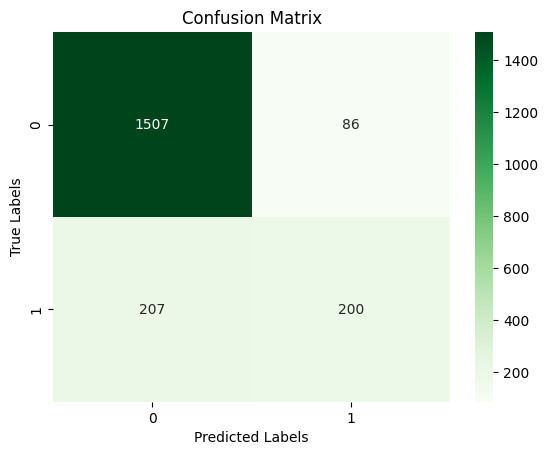

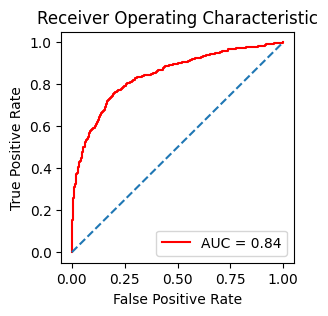

In [ ]:
# Creating the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Training the classifier
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

#Plotting AUC-ROC
y_proba=xgb_classifier.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

### Oversampling

In [ ]:
#importing package for sampling the data

from imblearn.over_sampling import SMOTE


In [ ]:
#pip install imbalanced-learn
#pip install -U threadpoolctl
#installing the required packages

In [ ]:

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE oversampling to the data
try:
    X_sm, y_sm = smote.fit_resample(X, y)
    print("Oversampling successful.")
    print(y_sm.value_counts())  # Check the value counts of the target labels after oversampling
except Exception as e:
    print(f"Error occurred during oversampling: {e}")

Oversampling successful.
1    7963
0    7963
Name: churn, dtype: int64


In [ ]:
#Train Test Split after using SMOTE technquie
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12740, 13)
(3186, 13)
(12740,)
(3186,)


In [ ]:
# Dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Gaussion NB':GaussianNB(),
    'XGB':xgb.XGBClassifier()
    }

# Function to train and evaluate models
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        results[name] = {'accuracy': accuracy, 'report': report}
    return results

# Train and evaluate models
model_results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

# Print the accuracy for each model
for model_name, results in model_results.items():
    print(f"{model_name} Accuracy: {results['accuracy']}")
    print(f"Classification Report:\n{results['report']}\n")


Logistic Regression Accuracy: 0.7074701820464532
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1633
           1       0.70      0.70      0.70      1553

    accuracy                           0.71      3186
   macro avg       0.71      0.71      0.71      3186
weighted avg       0.71      0.71      0.71      3186


Decision Tree Accuracy: 0.8361581920903954
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1633
           1       0.82      0.85      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186


Random Forest Accuracy: 0.8932831136220967
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1633
           1       0.88      0.

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1633
           1       0.93      0.88      0.90      1553

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186


---------------------------------------------



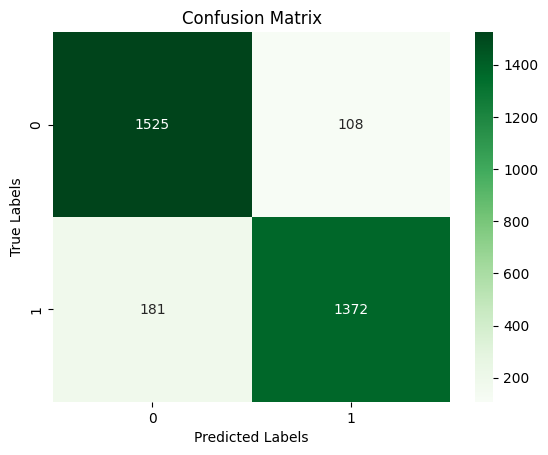

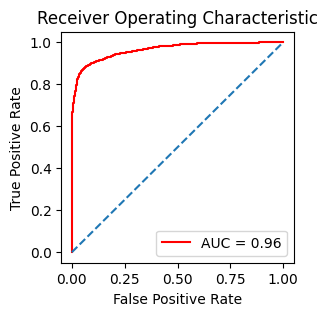

In [ ]:
# Create an XGBClassifier model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

#Compute Accuracy
evaluate_model(y_test,y_pred)

#Plotting AUC-ROC
y_proba=model.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

## Hypertuning

In [ ]:
#Perform GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print Best Parameter
print("Best Parameters: ", grid_search.best_params_)
# Print Best Cross Validation Score
print("Best Cross-Validation Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print ('Training')
# Evaluate best model testing
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_train, y_train)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_train, y_train_pred))

print ('')
print ('Testing')
# Evaluate best model testing
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Data: ", accuracy)
print(classification_report(y_test, y_test_pred))

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Cross-Validation Score:  0.8950549450549449
Training
Accuracy on Test Data:  0.9411302982731554
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6330
           1       0.97      0.92      0.94      6410

    accuracy                           0.94     12740
   macro avg       0.94      0.94      0.94     12740
weighted avg       0.94      0.94      0.94     12740


Testing
Accuracy on Test Data:  0.9036409290646579
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1633
           1       0.92      0.88      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.91      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



**perform SMOTE oversampling to balance the churn data to achieve higher performance of the model**

In [ ]:
#pip install shap
#shape is used for study of the features

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/f5/fc/e81722d6bec4fcba46e46ef895eddaeab0027ac71e78fc35ef351fac5fe4/shap-0.43.0-cp311-cp311-win_amd64.whl.metadata
  Using cached shap-0.43.0-cp311-cp311-win_amd64.whl.metadata (24 kB)
Using cached shap-0.43.0-cp311-cp311-win_amd64.whl (447 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
rf_clf = xgb.XGBClassifier(n_estimators =100)

In [ ]:
rf_clf.fit(X_train, y_train)
# Make prediction on the testing data
y_pred = rf_clf.predict(X_test)
# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1706
           1       0.88      0.93      0.90      1480

    accuracy                           0.91      3186
   macro avg       0.91      0.91      0.91      3186
weighted avg       0.91      0.91      0.91      3186



In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(rf_clf)

shap_values = explainer.shap_values(X_test)

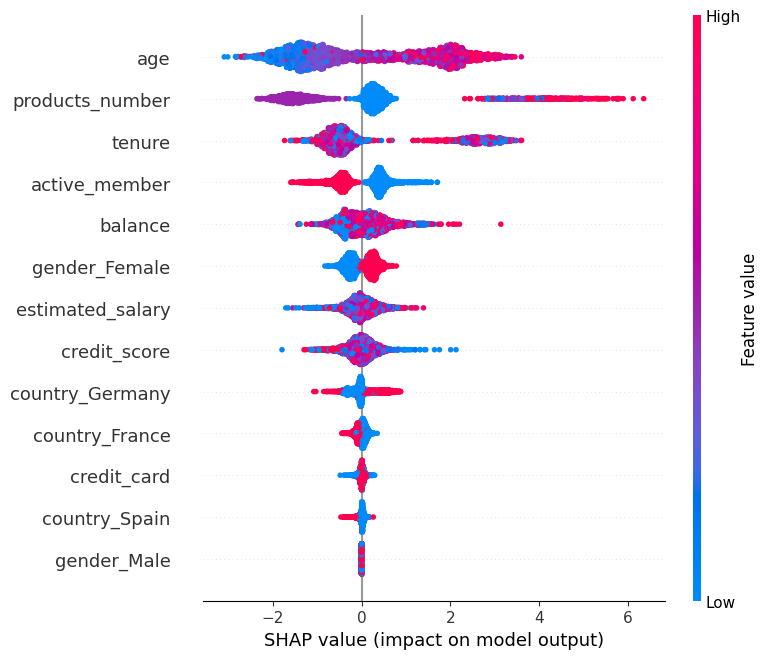

In [ ]:
shap.summary_plot(shap_values, X_test)

### Observations from the model
<ol>
<br><p><li>We can observe that the red and blue colors occupy half of the horizontal for each class. This means that each feature has an equal impact on the classification of both churn (label=1) and do-not churn(label=0) cases.
<br><p><li>However age, products_number and tenure are the first three features with the most predictive power.
<br><p><li>On the other country_France, estimated_salary,gender_Male, and credit_card do not contribute as much as the first three features.
</ol>

In [ ]:
## experementing the model with feature engineering - this was done based on the important features that were arrived from the model 
#but the performance of the model has not improved so we decided to stick with smote
# 1st Attribute - Balance Salary Ratio
#df2['BalanceSalaryRatio'] = df2.balance/df2.estimated_salary
#sns.boxplot(y='BalanceSalaryRatio',x = 'churn', hue = 'churn',data = df2)
#plt.ylim(-1, 5)

#  2nd Attribute-Tenure By Age
#df2['TenureByAge'] = df2.tenure/(df2.age)
#sns.boxplot(y='TenureByAge',x = 'churn', hue = 'churn',data = df2)
#plt.ylim(-0.2, 0.7)
#plt.show()

# 3rd Attribute- Credit Score Given Age
#df2['CreditScoreGivenAge'] = df2.credit_score/(df2.age)
#sns.boxplot(y='CreditScoreGivenAge',x = 'churn', hue = 'churn',data = df2)
#plt.show()

#continuous_columns = ['credit_score','age','tenure','balance','products_number','estimated_salary', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df2[continuous_columns] = scaler.fit_transform(df2[continuous_columns])
#df2.head()

#Train Test Split
#X = df2.drop('churn',axis=1)
#y = df2['churn']

#print(X.shape)
#print(y.shape)



In [ ]:

#pip install joblib
#import joblib
# save the model to disk which would be used for model deployment
#joblib.dump(rf_clf, "rf_model.sav")

['rf_model.sav']